# BME 252 Accelerometer Project

Read in sensor values:

In [120]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
#read in Mikaela data
data = np.loadtxt('mikaela_1.csv', delimiter=',', skiprows = 1)
m_aTime = data[:,0]
m_aX = data[:, 1]
m_aY = data[:, 2]
m_aZ = data[:, 3]
m_gTime = data[:, 4]
m_gX = data[:,5]
m_gY = data[:, 6]
m_gZ = data[:, 7]

#read in Daphne Data
data = np.loadtxt('daphne_1.csv', delimiter=',', skiprows = 1)
d_aTime = data[:,0]
d_aX = data[:, 1]
d_aY = data[:, 2]
d_aZ = data[:, 3]
d_gTime = data[:, 4]
d_gX = data[:,5]
d_gY = data[:, 6]
d_gZ = data[:, 7]

#read in Cassie Data
data = np.loadtxt('cassie_1.csv', delimiter=',', skiprows = 1)
c_aTime = data[:,0]
c_aX = data[:, 1]
c_aY = data[:, 2]
c_aZ = data[:, 3]
c_gTime = data[:, 4]
c_gX = data[:,5]
c_gY = data[:, 6]
c_gZ = data[:, 7]

## Acceleration Signals

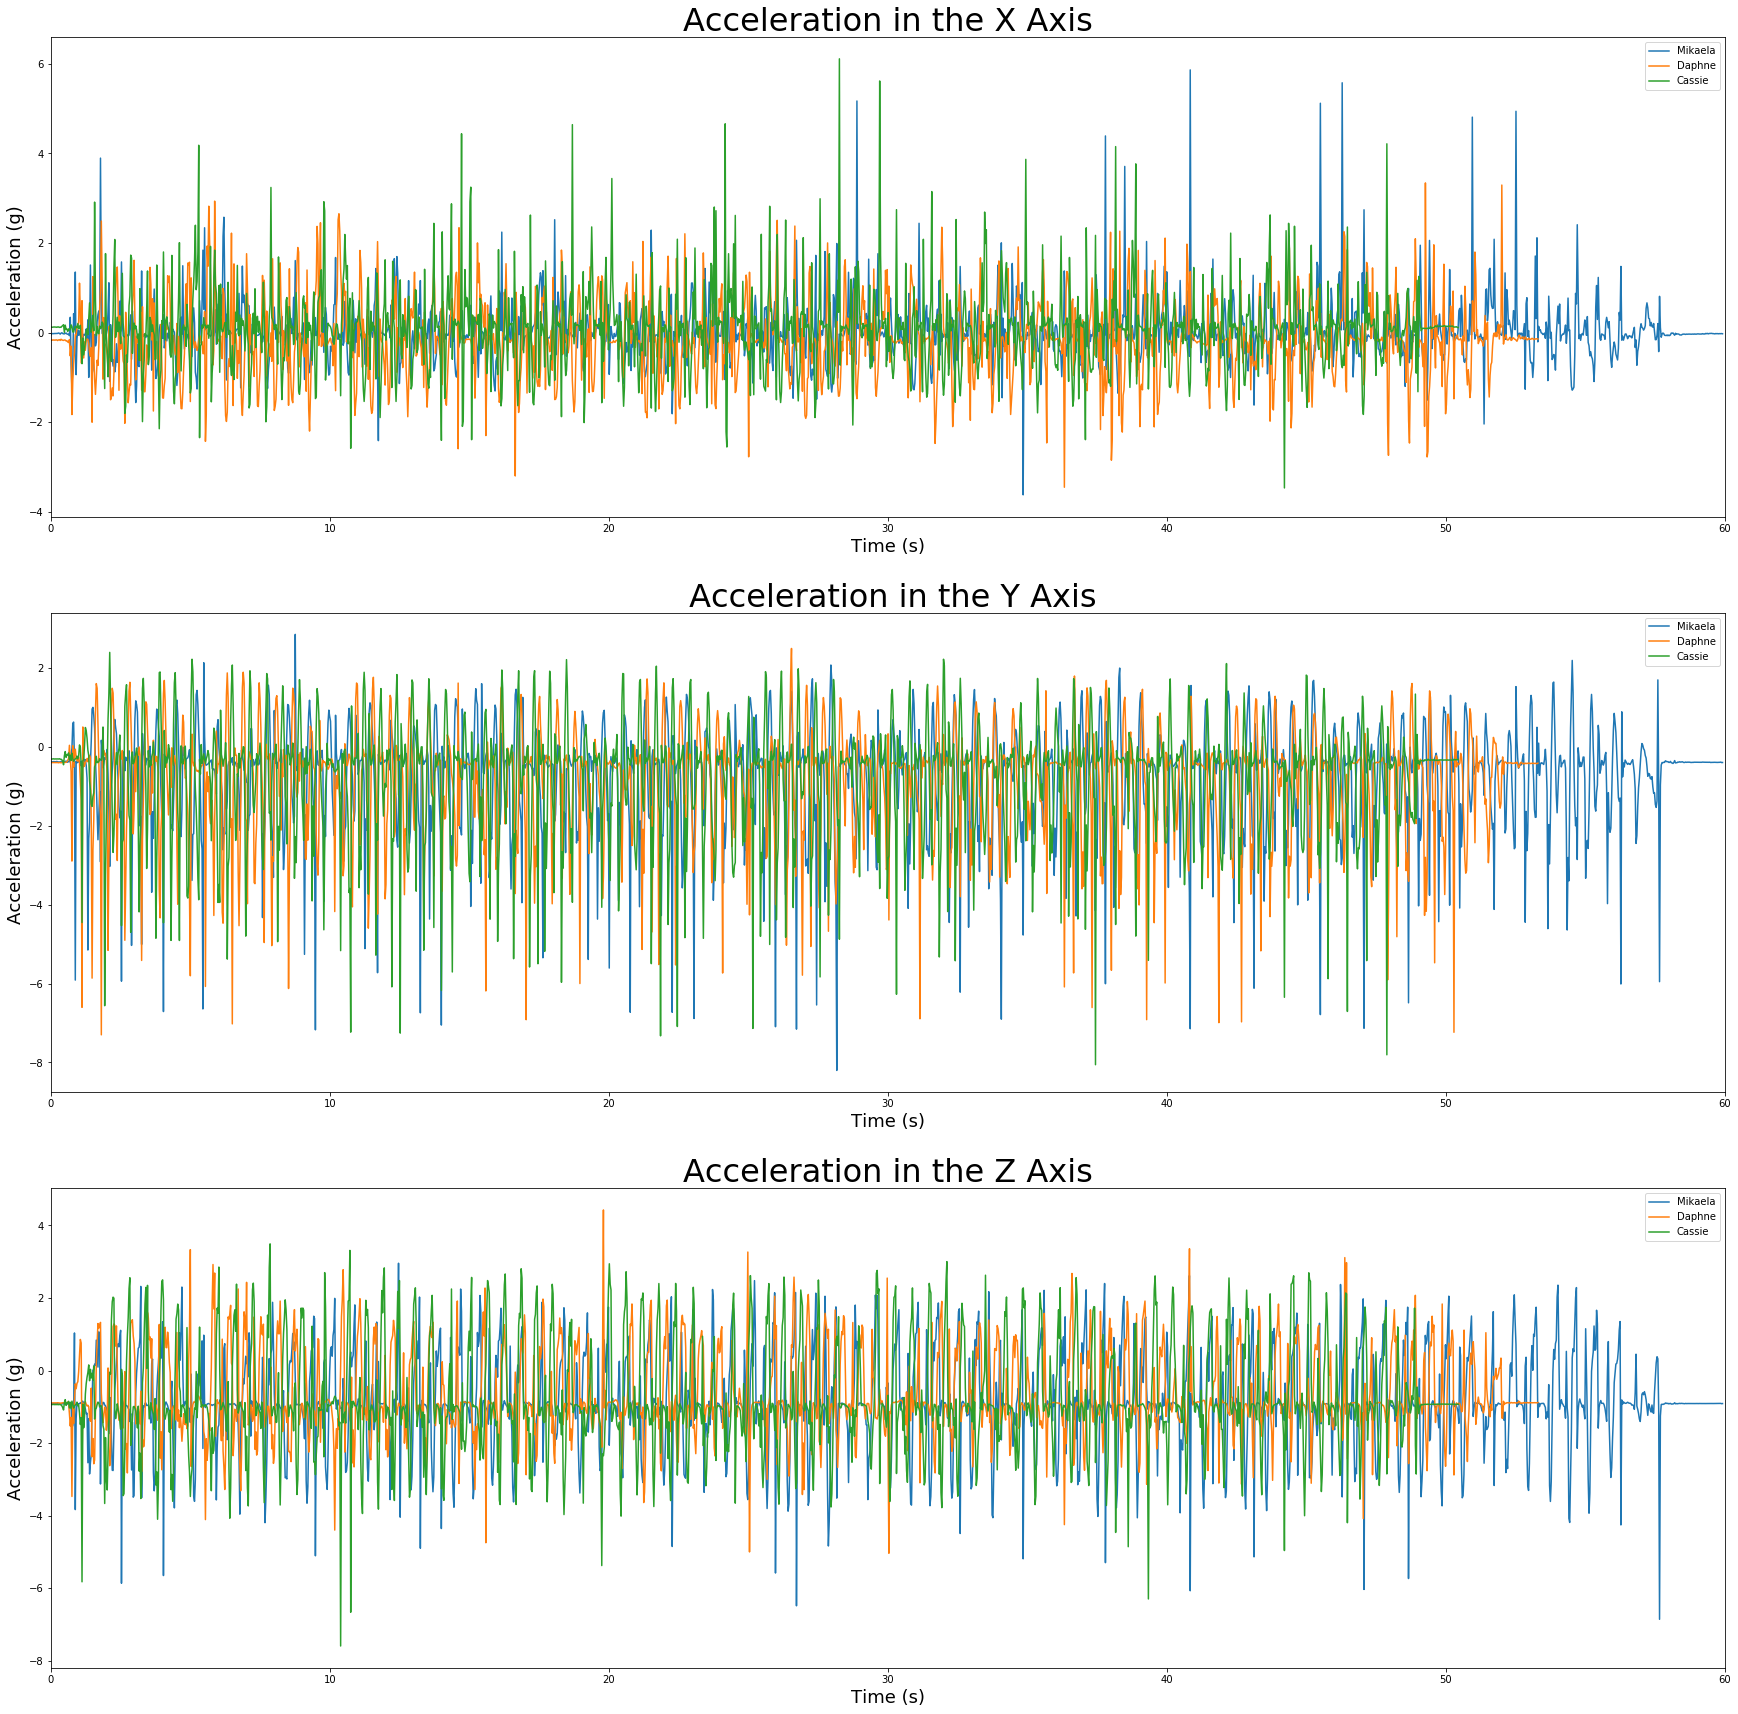

In [121]:
plt.figure(figsize = (30,30))
m_aTime = m_aTime - m_aTime[0]
d_aTime = d_aTime - d_aTime[0]
c_aTime = c_aTime - c_aTime[0]
ylabel = 'Acceleration (g)'
plt.subplot(3,1,1)
plt.title('Acceleration in the X Axis', fontsize=32)
plotVals(m_aTime, m_aX,'Mikaela')
plotVals(d_aTime, d_aX,'Daphne')
plotVals(c_aTime, c_aX,'Cassie')

plt.subplot(3,1,2)
plt.title(' Acceleration in the Y Axis', fontsize=32)
plotVals(m_aTime, m_aY,'Mikaela')
plotVals(d_aTime, d_aY,'Daphne')
plotVals(c_aTime, c_aY,'Cassie')

plt.subplot(3,1,3)
plt.title('Acceleration in the Z Axis', fontsize=32)
plotVals(m_aTime, m_aZ,'Mikaela')
plotVals(d_aTime, d_aZ,'Daphne')
plotVals(c_aTime, c_aZ,'Cassie')

plt.show()


Plot max acceleration values for each axis, and absolute acceleration:

In [122]:
def plotVals(x,y,identifier):
    plt.xlim(0,60)
    plt.plot(x,y, label = identifier)
    plt.ylabel(ylabel, fontsize = 18)
    plt.xlabel('Time (s)', fontsize = 18)
    plt.legend()


In [123]:
def getAbsVals(x, y, z):
    return np.sqrt(x**2 + y**2 + z**2)

In [124]:
def getMaxArray(array):
    return np.full((np.size(array)), np.max(array))

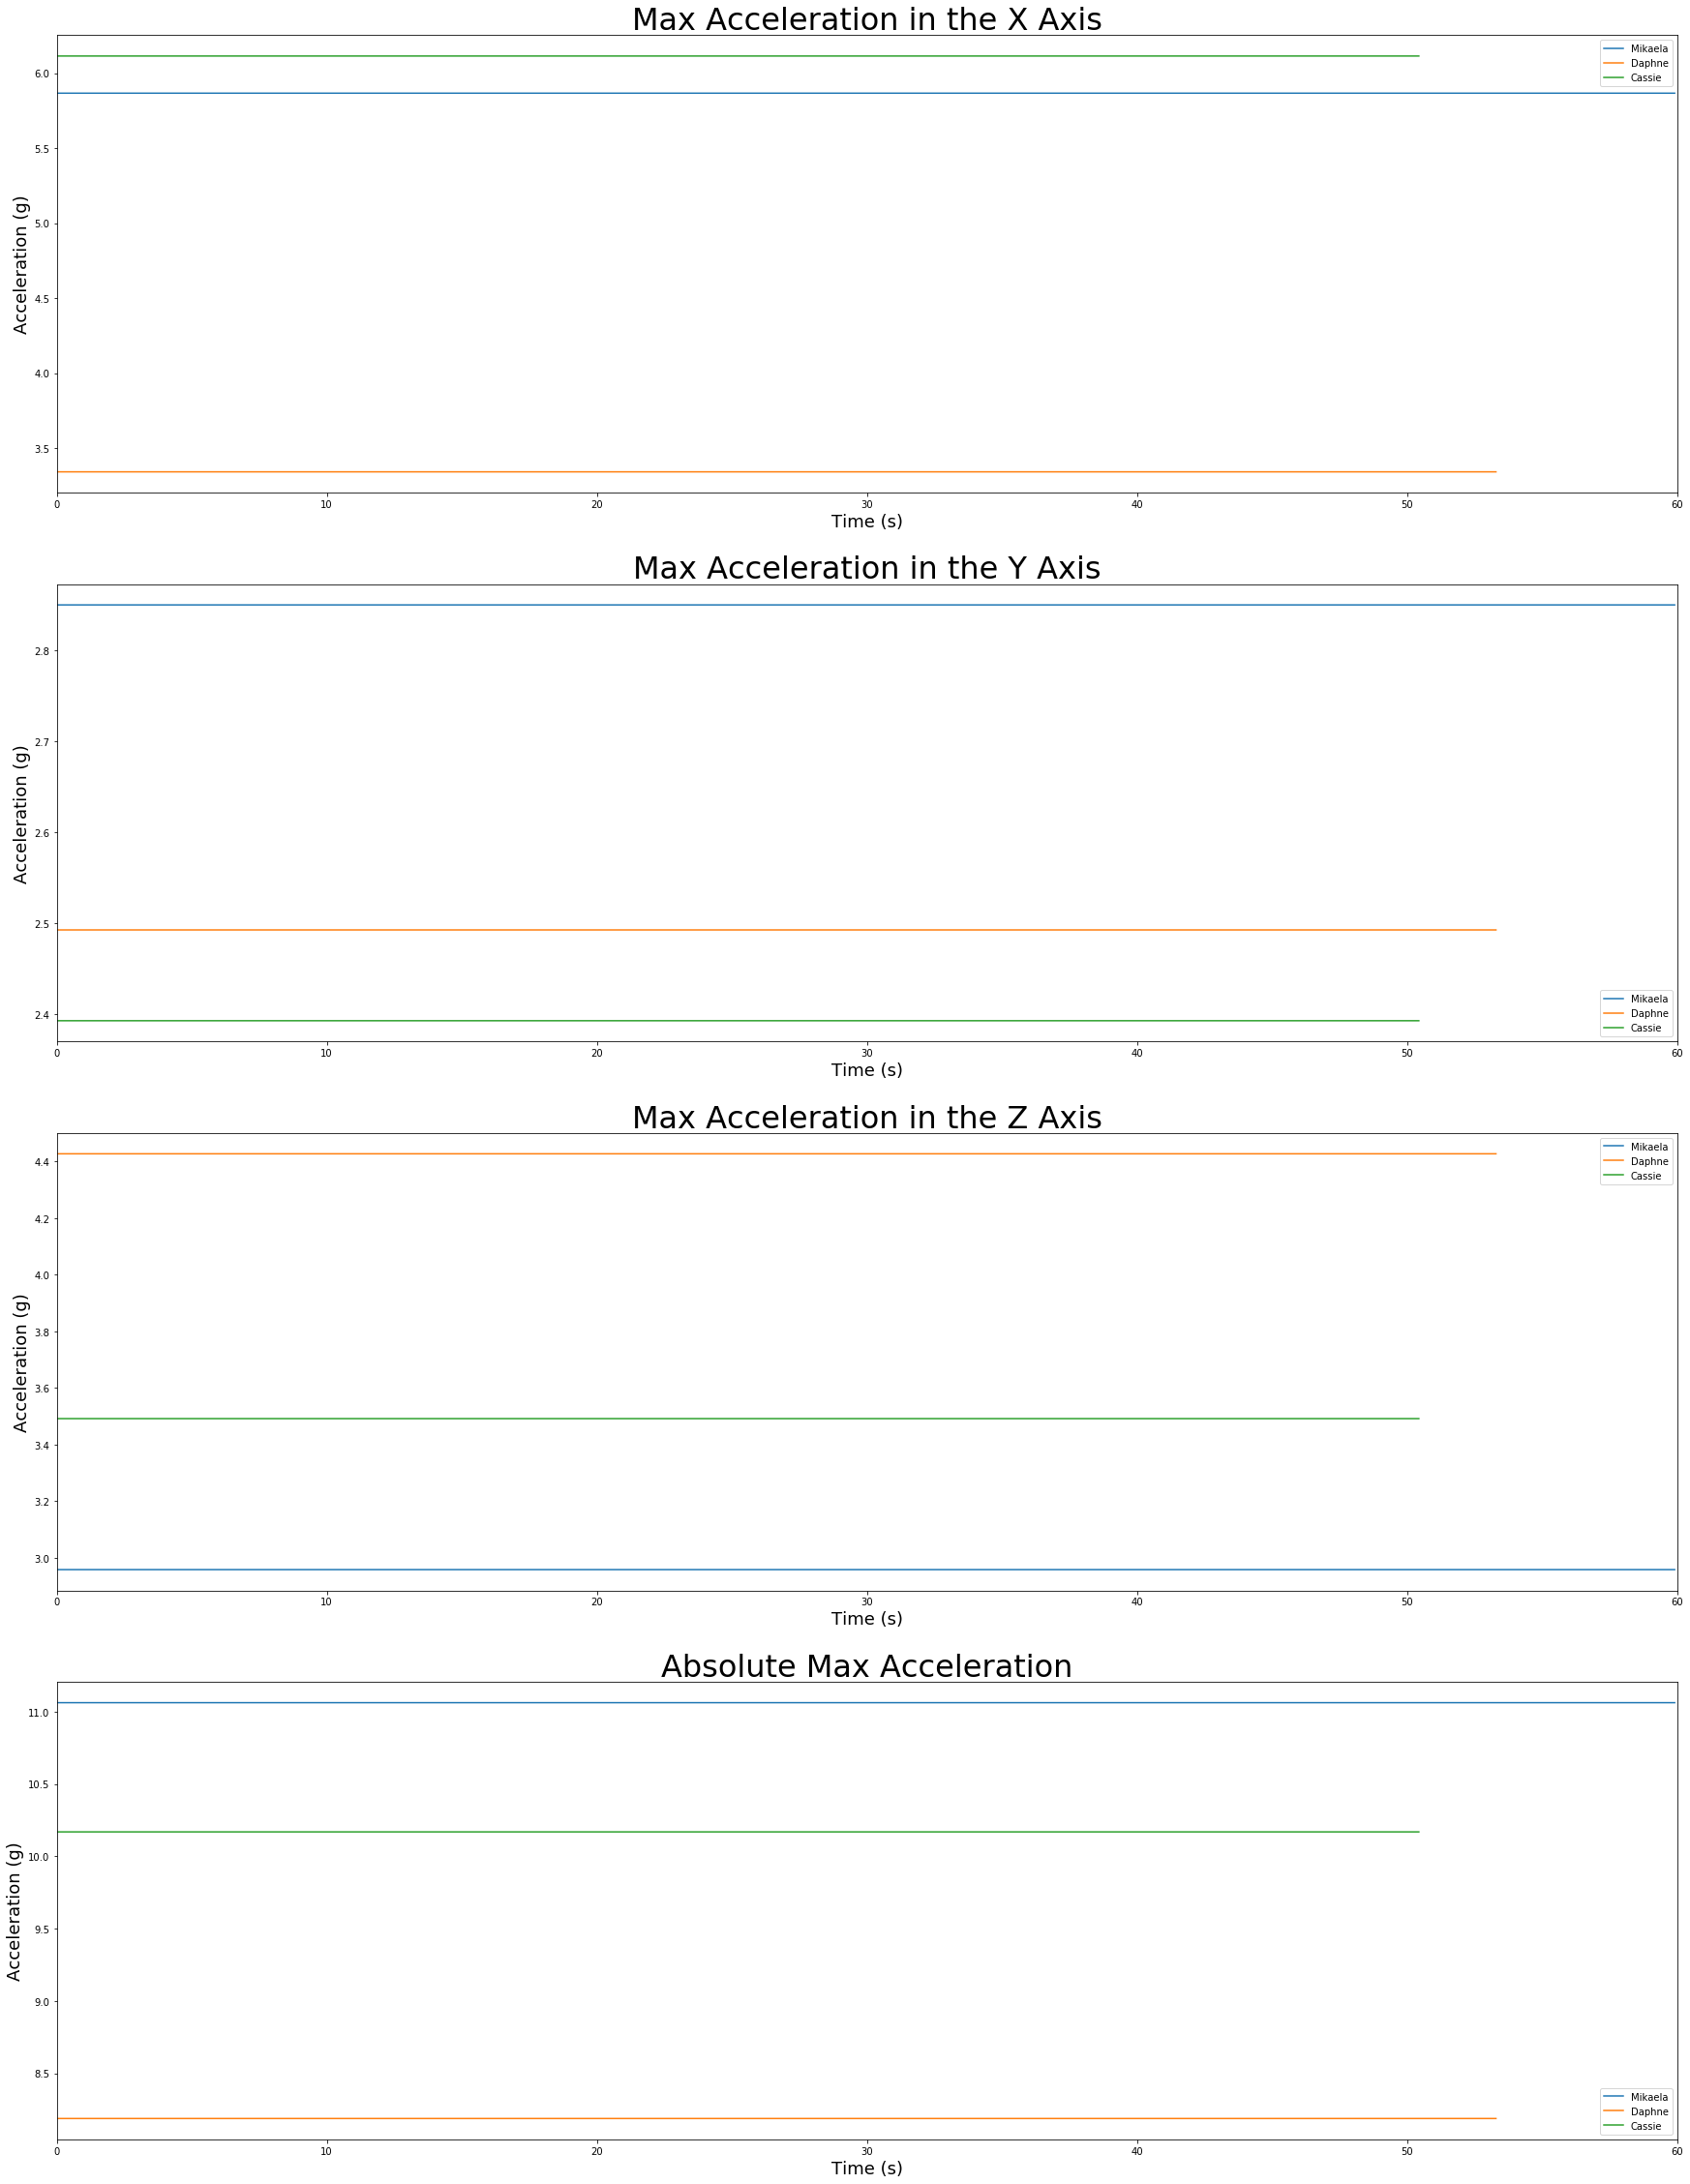

In [125]:
#plot max  X acceleration
m_absVals = getAbsVals(m_aX, m_aY, m_aZ)
d_absVals = getAbsVals(d_aX, d_aY, d_aZ)
c_absVals = getAbsVals(c_aX, c_aY, c_aZ)

plt.figure(figsize = (30,40))
plt.subplot(4,1,1)
plt.title('Max Acceleration in the X Axis', fontsize=32)
plotVals(m_aTime, getMaxArray(m_aX), 'Mikaela')
plotVals(d_aTime, getMaxArray(d_aX), 'Daphne')
plotVals(c_aTime, getMaxArray(c_aX), 'Cassie')

plt.subplot(4,1,2)
plt.title('Max Acceleration in the Y Axis', fontsize=32)
plotVals(m_aTime, getMaxArray(m_aY), 'Mikaela')
plotVals(d_aTime, getMaxArray(d_aY), 'Daphne')
plotVals(c_aTime, getMaxArray(c_aY), 'Cassie')

plt.subplot(4,1,3)
plt.title('Max Acceleration in the Z Axis', fontsize=32)
plotVals(m_aTime, getMaxArray(m_aZ), 'Mikaela')
plotVals(d_aTime, getMaxArray(d_aZ), 'Daphne')
plotVals(c_aTime, getMaxArray(c_aZ), 'Cassie')

plt.subplot(4,1,4)
plt.title('Absolute Max Acceleration', fontsize=32)
plotVals(m_aTime, getMaxArray(m_absVals), 'Mikaela')
plotVals(d_aTime, getMaxArray(d_absVals), 'Daphne')
plotVals(c_aTime, getMaxArray(c_absVals), 'Cassie')

plt.show()


Plot average acceleration for each axis and absolute acceleration:

In [126]:
def getMeanArray(array):
    return np.full((np.size(array)), np.mean(array))
    

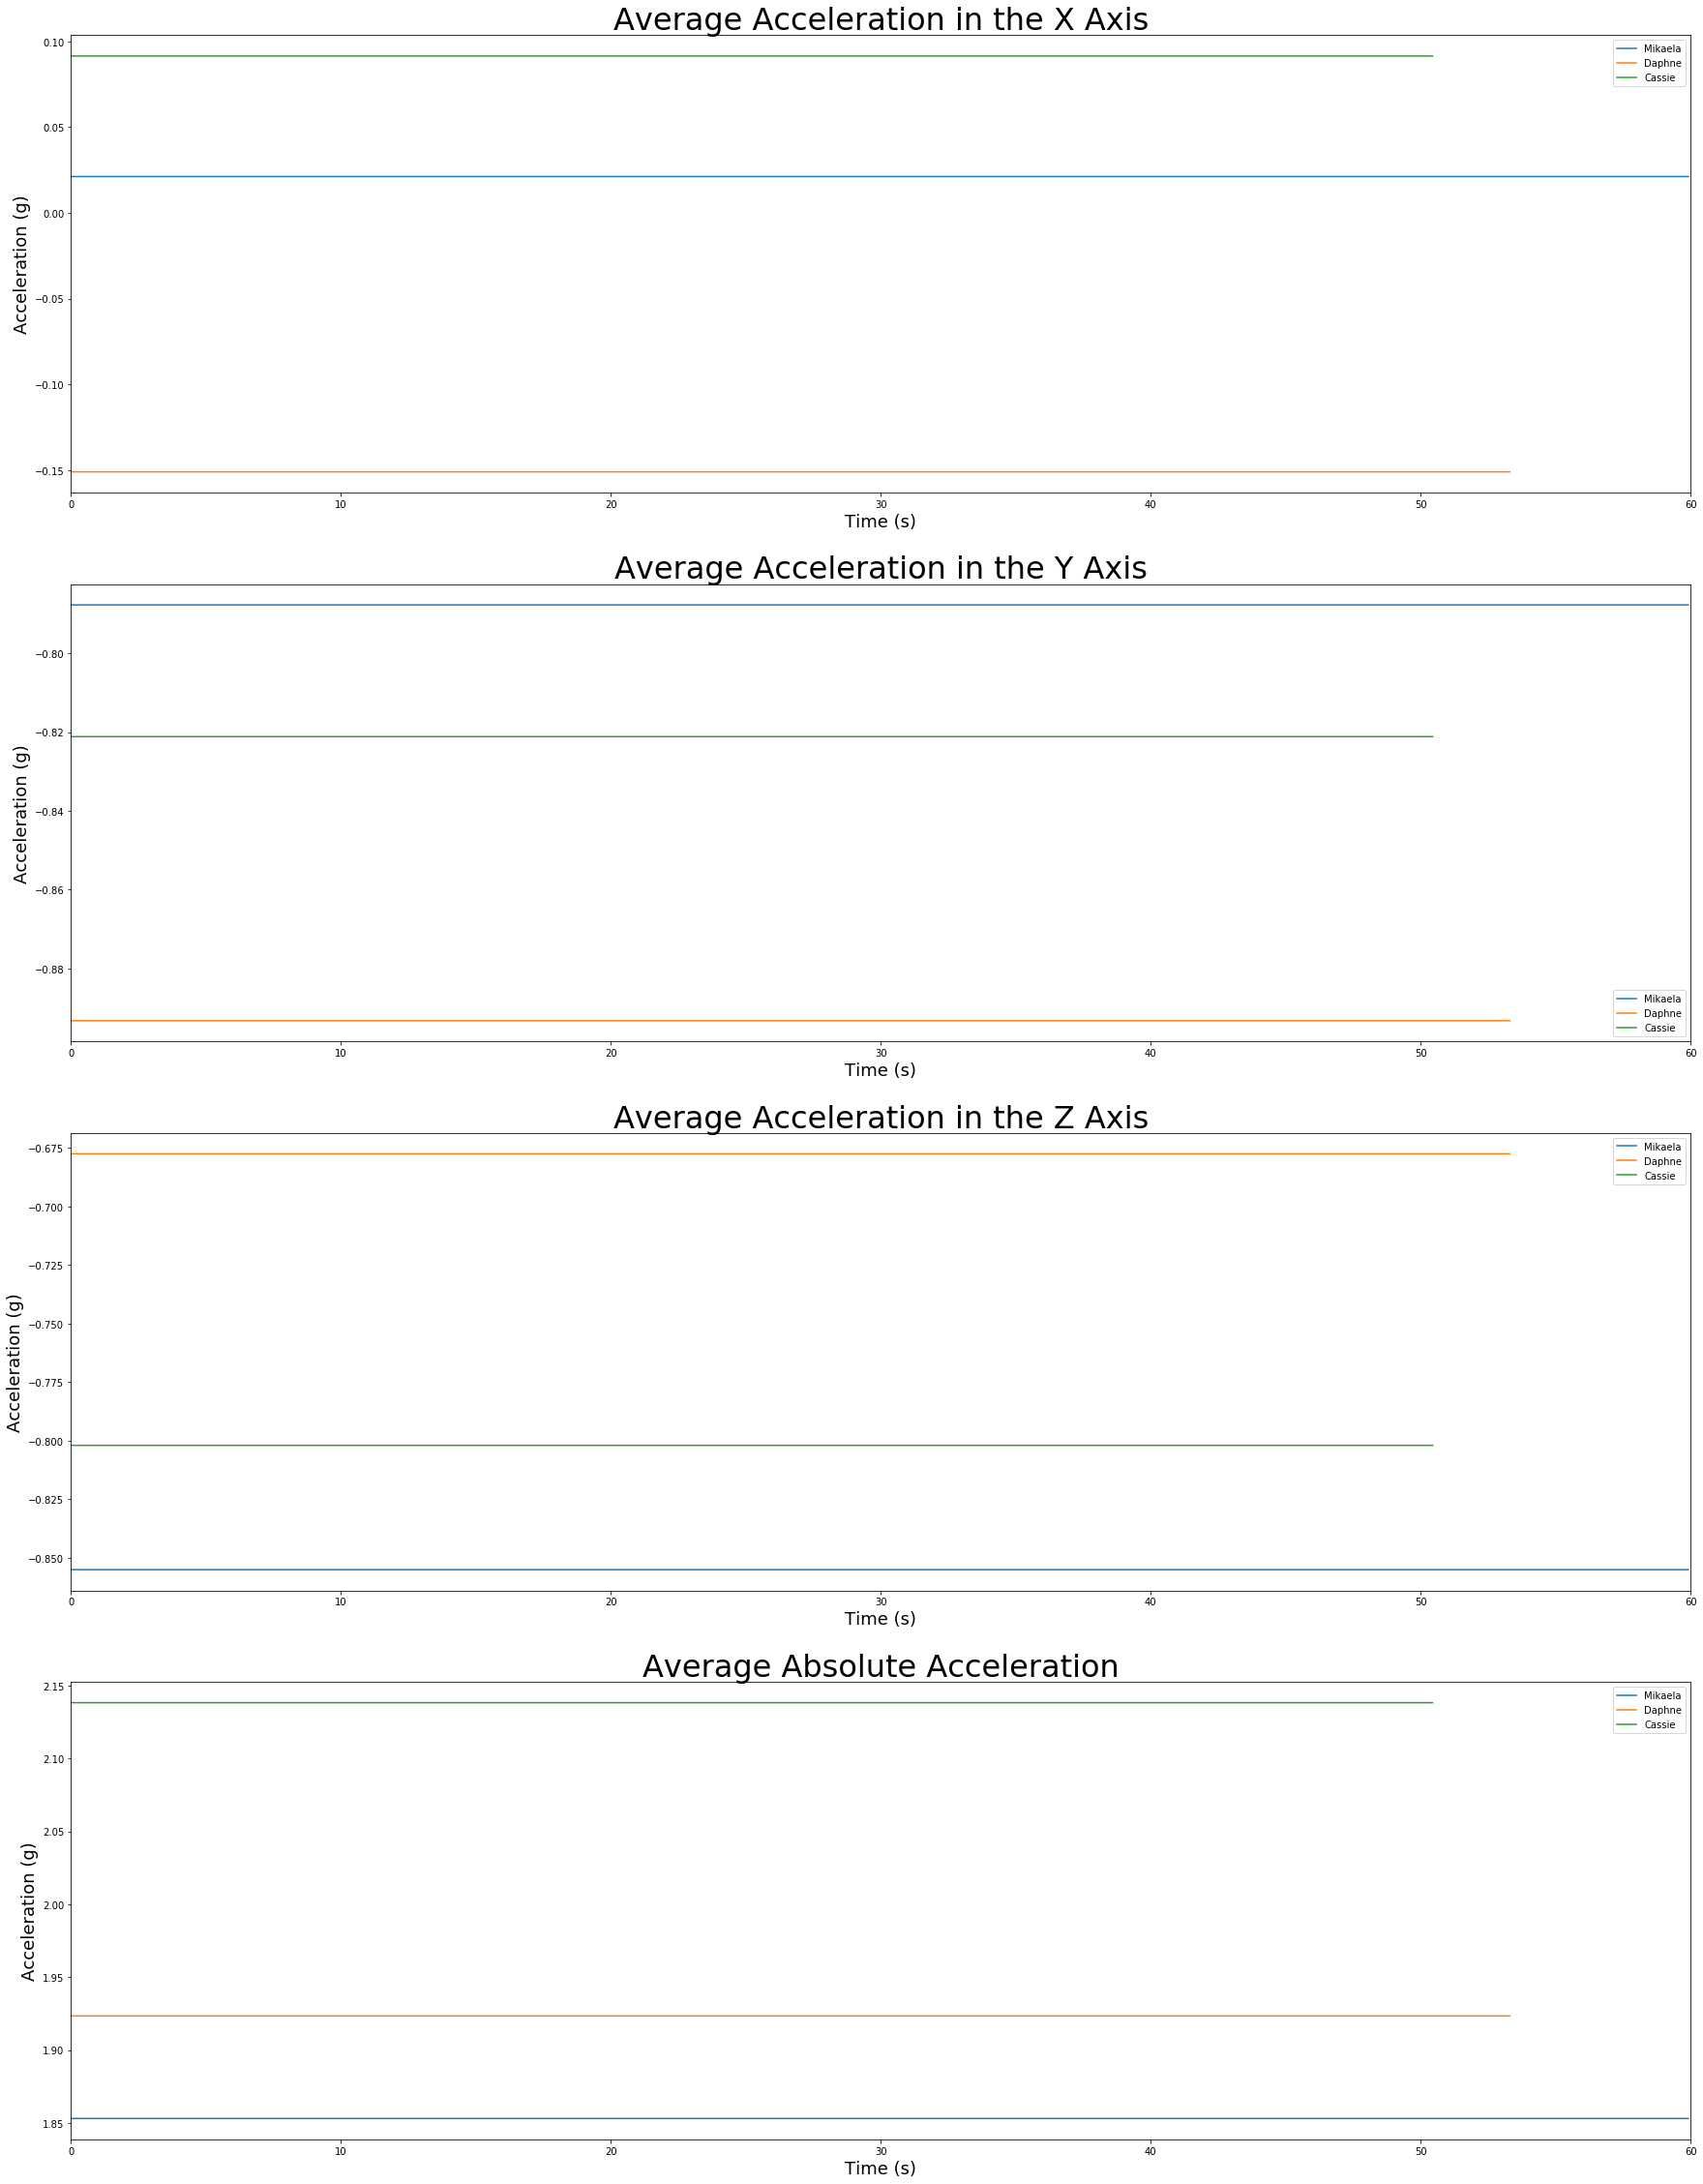

In [127]:
#Calculate mean accelerations
plt.figure(figsize = (30,40))
plt.subplot(4,1,1)

plt.title('Average Acceleration in the X Axis', fontsize=32)
plotVals(m_aTime, getMeanArray(m_aX), 'Mikaela')
plotVals(d_aTime, getMeanArray(d_aX), 'Daphne')
plotVals(c_aTime, getMeanArray(c_aX), 'Cassie')

plt.subplot(4,1,2)
plt.title('Average Acceleration in the Y Axis', fontsize=32)
plotVals(m_aTime, getMeanArray(m_aY), 'Mikaela')
plotVals(d_aTime, getMeanArray(d_aY), 'Daphne')
plotVals(c_aTime, getMeanArray(c_aY), 'Cassie')

plt.subplot(4,1,3)
plt.title('Average Acceleration in the Z Axis', fontsize=32)
plotVals(m_aTime, getMeanArray(m_aZ), 'Mikaela')
plotVals(d_aTime, getMeanArray(d_aZ), 'Daphne')
plotVals(c_aTime, getMeanArray(c_aZ), 'Cassie')

plt.subplot(4,1,4)
plt.title('Average Absolute Acceleration', fontsize=32)
plotVals(m_aTime, getMeanArray(m_absVals), 'Mikaela')
plotVals(d_aTime, getMeanArray(d_absVals), 'Daphne')
plotVals(c_aTime, getMeanArray(c_absVals), 'Cassie')


plt.show()

## Velocity Signals

In [128]:
def getIntegral(x1, x2, start):
    return integrate.cumtrapz(x1,x2, initial = start)

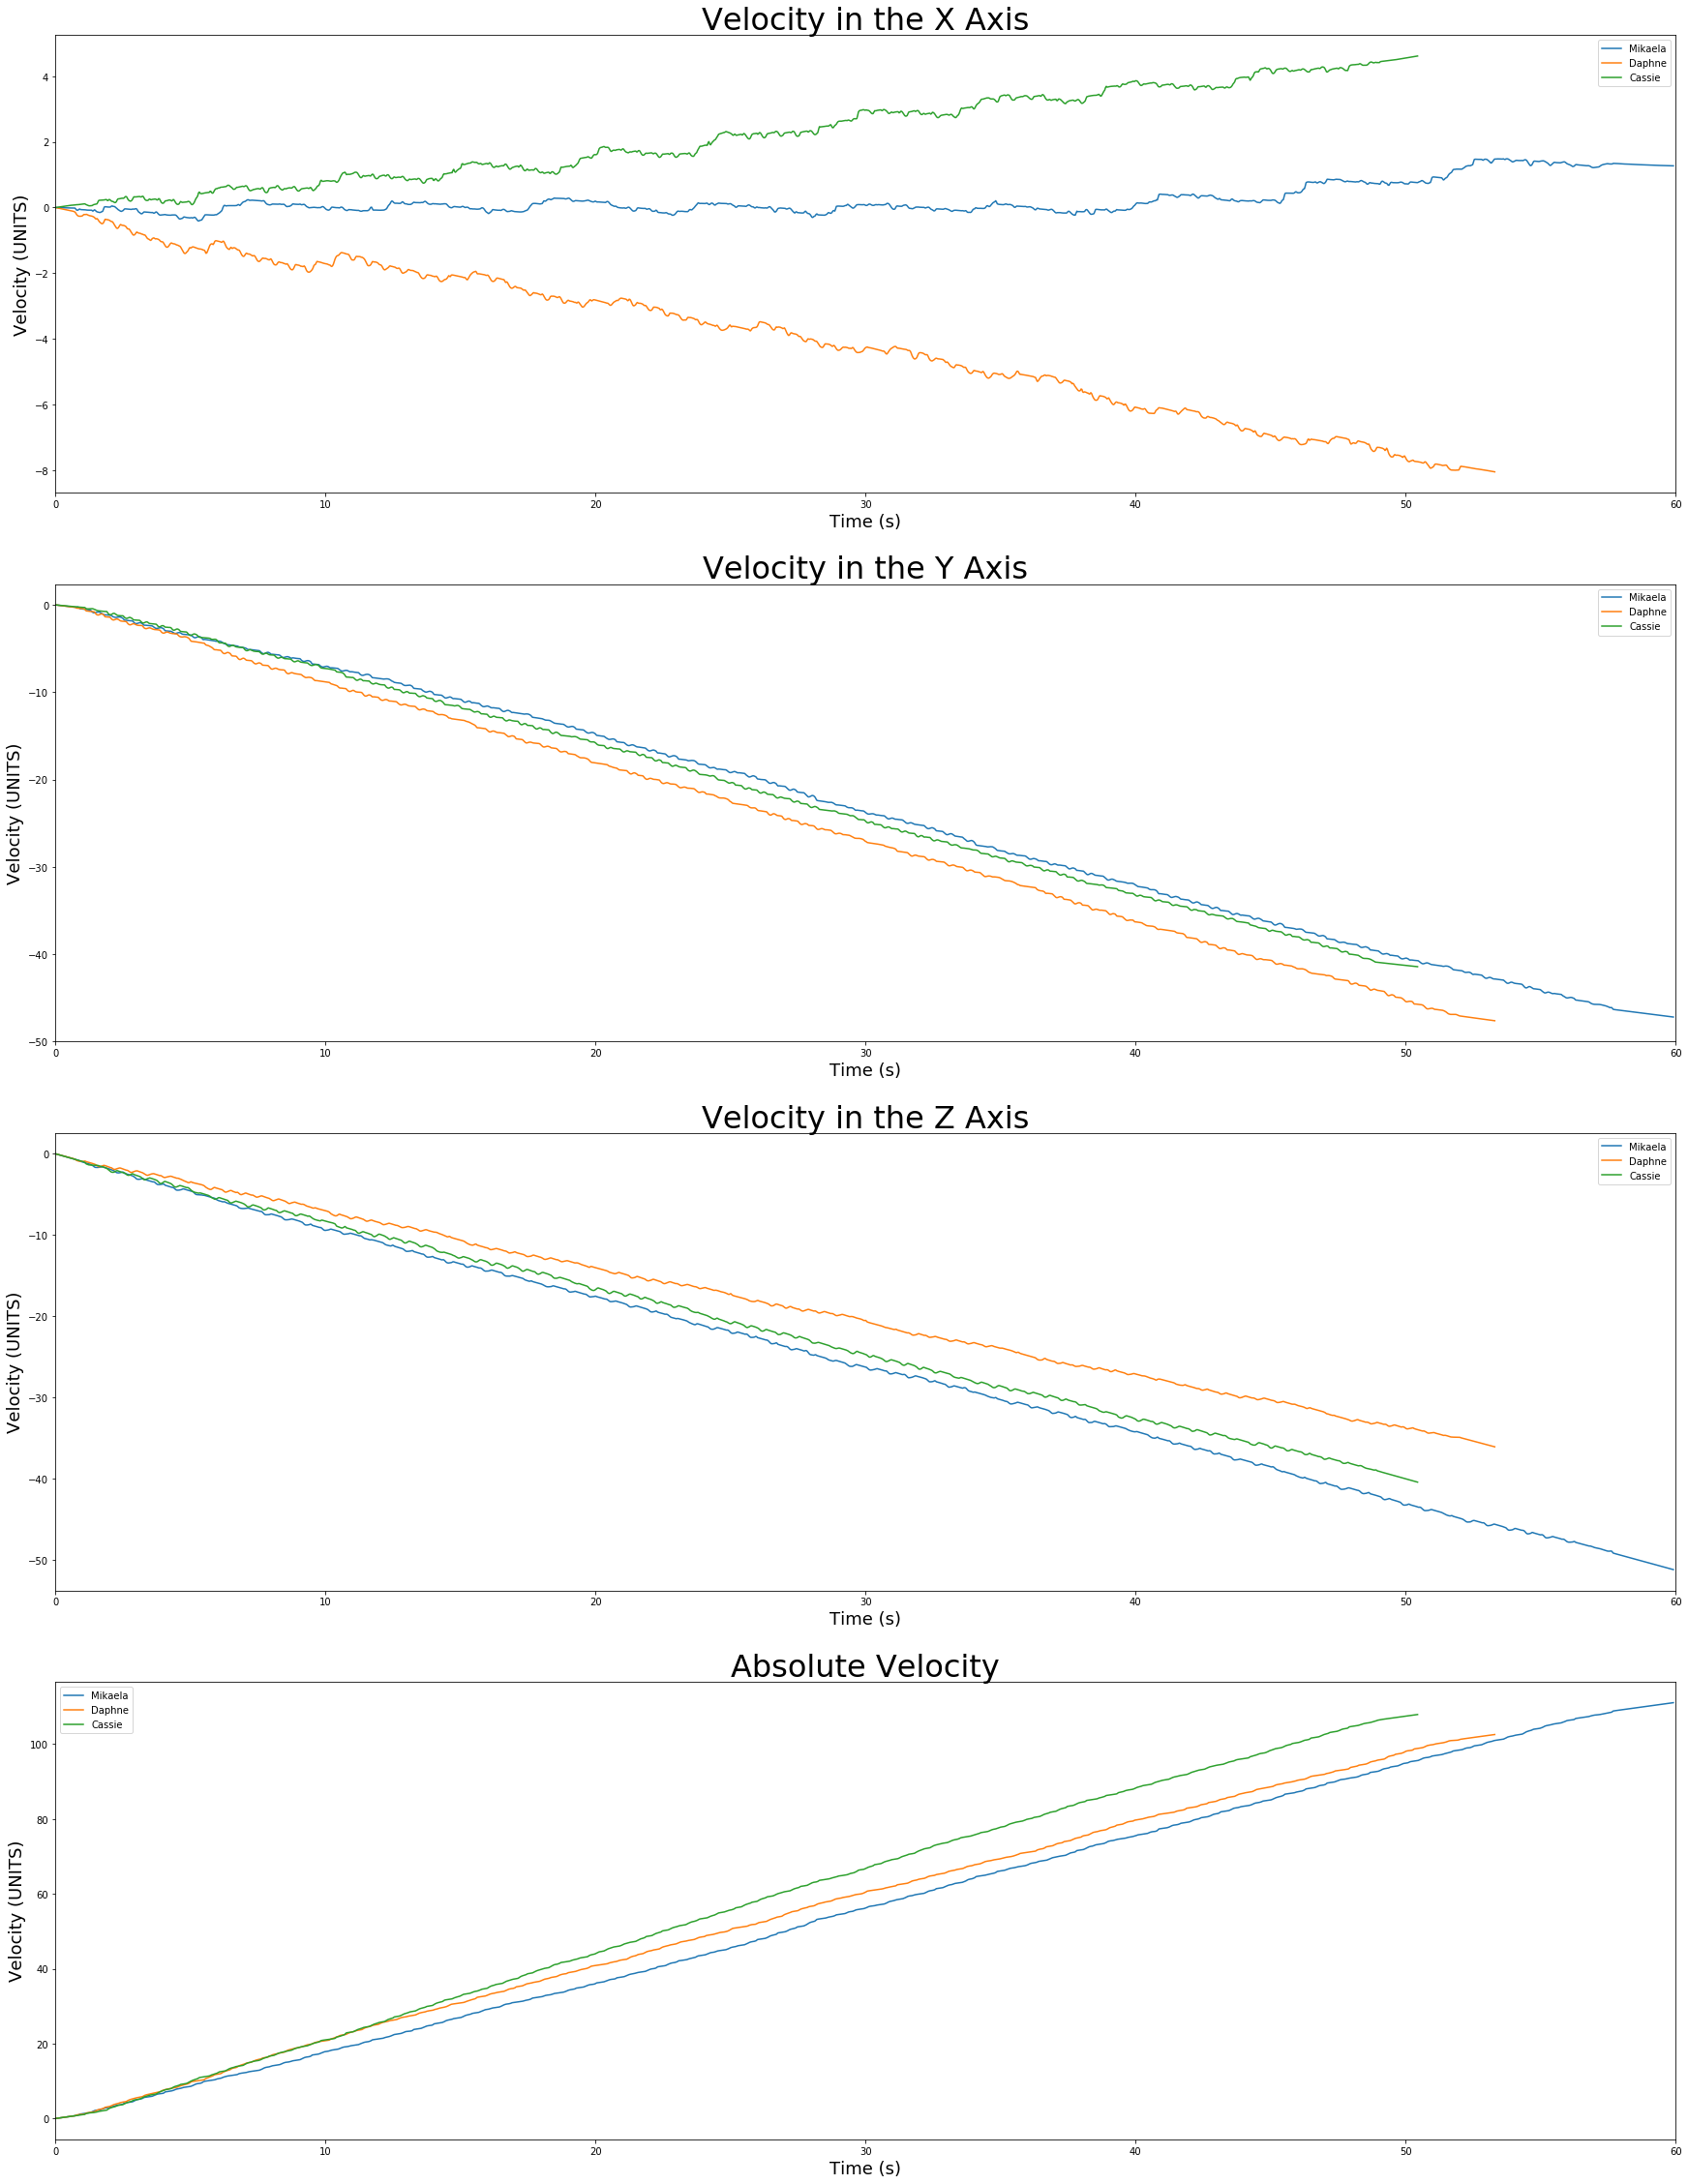

In [129]:
#Calculate velocity
plt.figure(figsize = (30,40))
plt.subplot(4,1,1)
ylabel = 'Velocity (UNITS)'
plt.title('Velocity in the X Axis', fontsize=32)
plotVals(m_aTime, getIntegral(m_aX, m_aTime, 0), 'Mikaela')
plotVals(d_aTime, getIntegral(d_aX, d_aTime, 0), 'Daphne')
plotVals(c_aTime, getIntegral(c_aX, c_aTime, 0), 'Cassie')

plt.subplot(4,1,2)
plt.title('Velocity in the Y Axis', fontsize=32)
plotVals(m_aTime, getIntegral(m_aY, m_aTime, 0), 'Mikaela')
plotVals(d_aTime, getIntegral(d_aY, d_aTime, 0), 'Daphne')
plotVals(c_aTime, getIntegral(c_aY, c_aTime, 0), 'Cassie')

plt.subplot(4,1,3)
plt.title('Velocity in the Z Axis', fontsize=32)
plotVals(m_aTime, getIntegral(m_aZ, m_aTime, 0), 'Mikaela')
plotVals(d_aTime, getIntegral(d_aZ, d_aTime, 0), 'Daphne')
plotVals(c_aTime, getIntegral(c_aZ, c_aTime, 0), 'Cassie')

plt.subplot(4,1,4)
plt.title('Absolute Velocity', fontsize=32)
plotVals(m_aTime, getIntegral(m_absVals, m_aTime, 0), 'Mikaela')
plotVals(d_aTime, getIntegral(d_absVals, d_aTime, 0), 'Daphne')
plotVals(c_aTime, getIntegral(c_absVals, c_aTime, 0), 'Cassie')
plt.show()

## Displacement Signals

In [130]:
def getPosition(x1, x2, start):
    v = integrate.cumtrapz(x1, x2, initial = start)
    return integrate.cumtrapz(v, x2, initial = start)

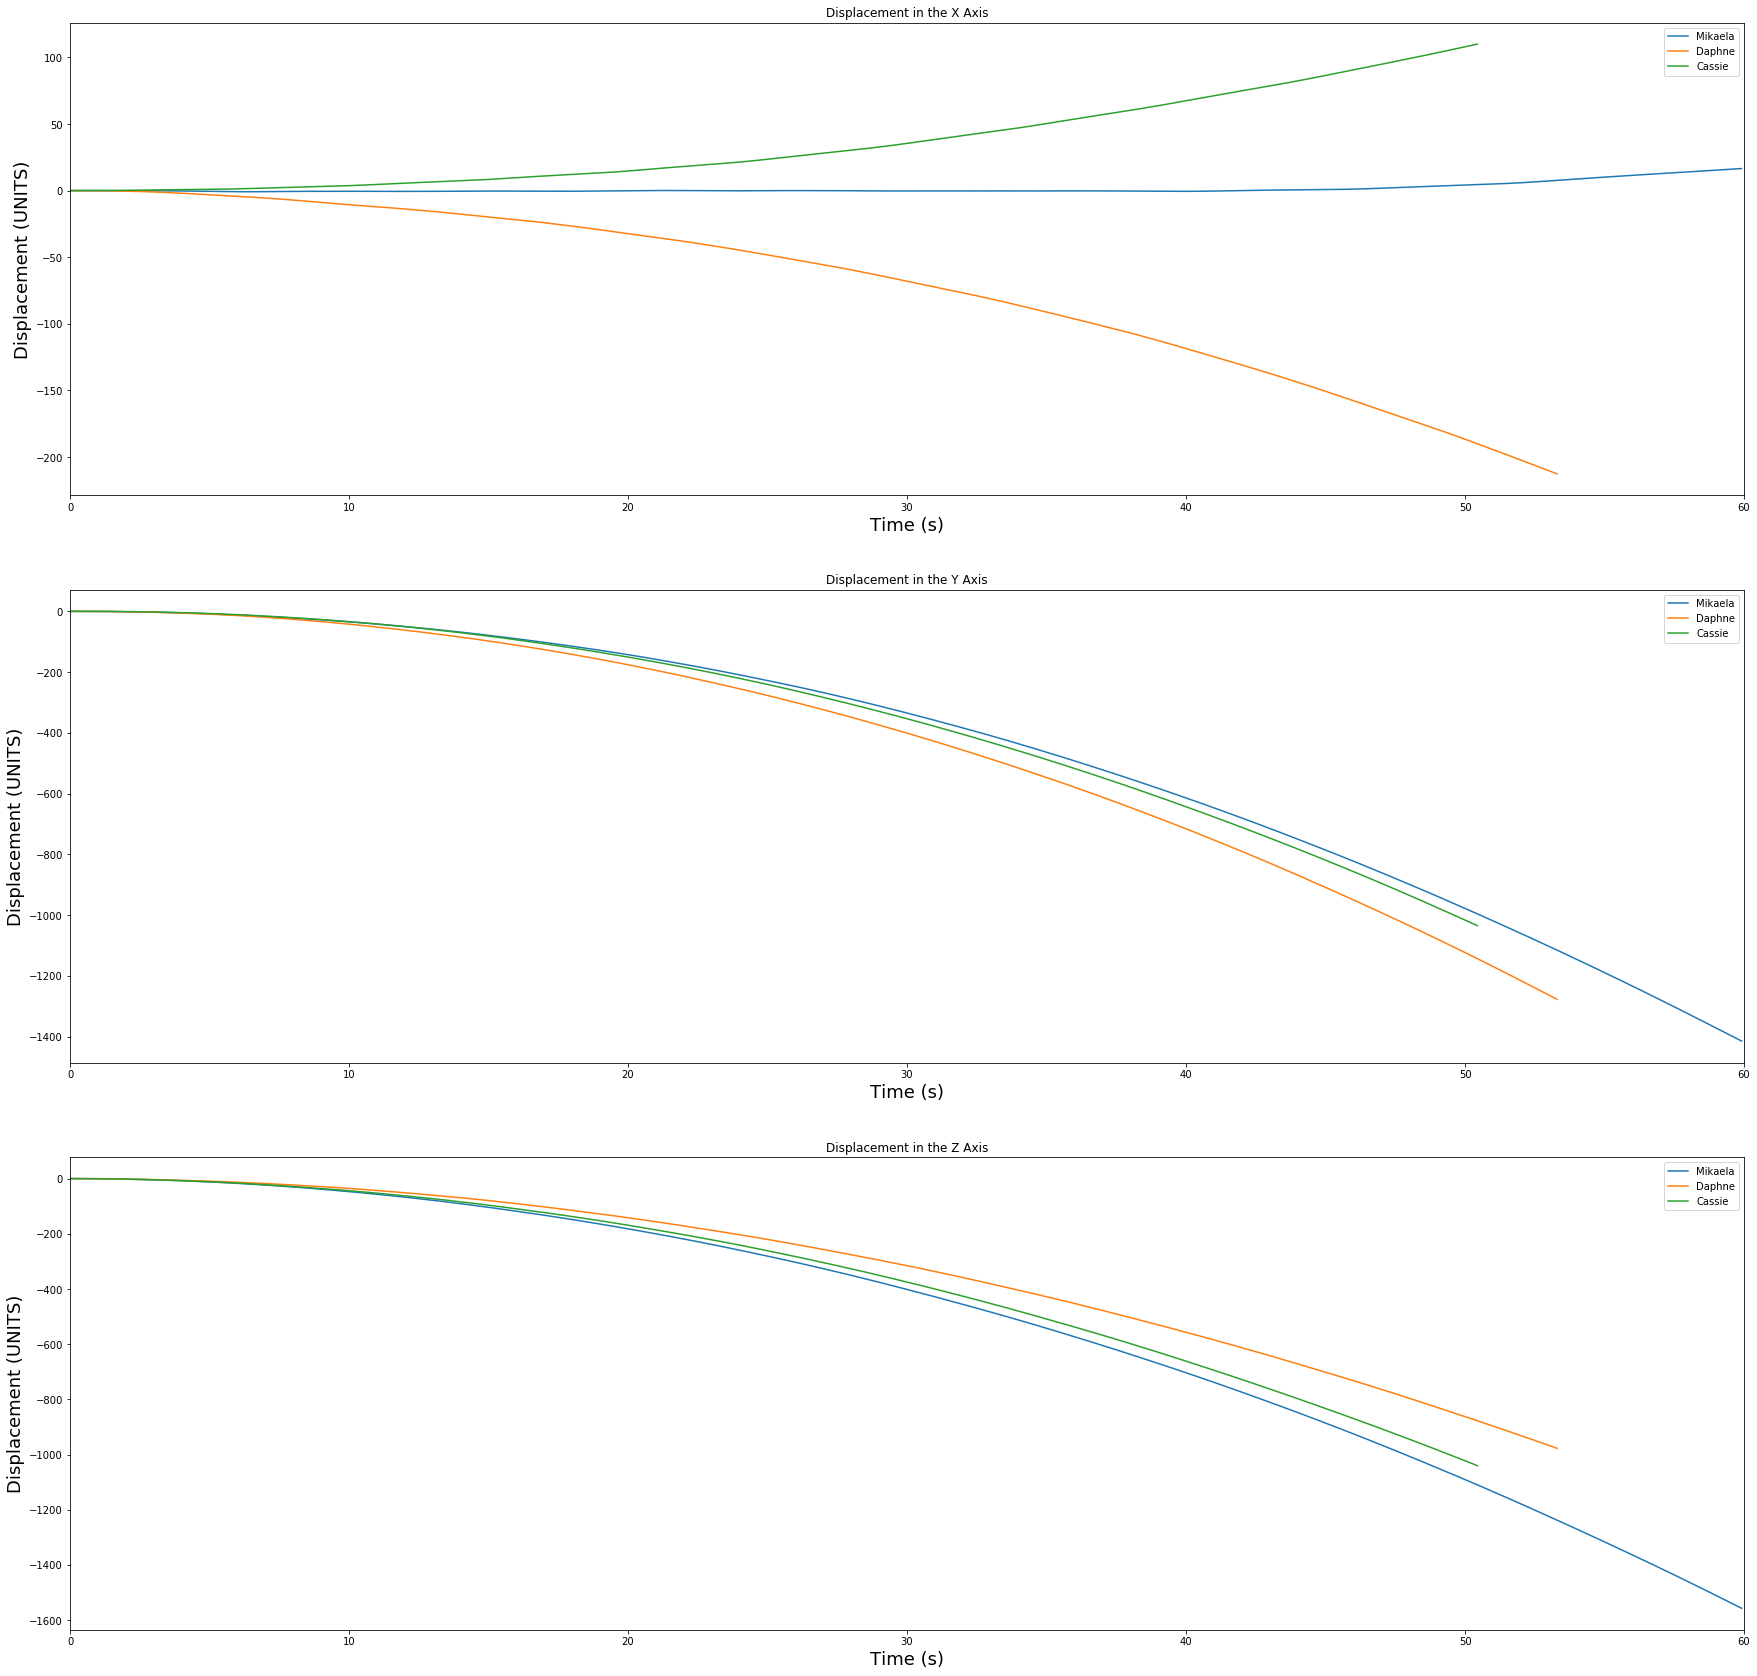

In [132]:
#Calculate distance

#Distance X
m_dX = getPosition(m_aX, m_aTime, 0)
d_dX = getPosition(d_aX, d_aTime, 0)
c_dX = getPosition(c_aX, c_aTime, 0)

#Distance Y
m_dY = getPosition(m_aY, m_aTime, 0)
d_dY = getPosition(d_aY, d_aTime, 0)
c_dY = getPosition(c_aY, c_aTime, 0)

#Distance Z
m_dZ = getPosition(m_aZ, m_aTime, 0)
d_dZ = getPosition(d_aZ, d_aTime, 0)
c_dZ = getPosition(c_aZ, c_aTime, 0)

ylabel = 'Displacement (UNITS)'

plt.figure(figsize = (30,40))
plt.subplot(4,1,1)
plt.title("Displacement in the X Axis")
plotVals(m_aTime, m_dX, 'Mikaela')
plotVals(d_aTime, d_dX, 'Daphne')
plotVals(c_aTime, c_dX, 'Cassie')

plt.subplot(4,1,2)
plt.title("Displacement in the Y Axis")
plotVals(m_aTime, m_dY, 'Mikaela')
plotVals(d_aTime, d_dY, 'Daphne')
plotVals(c_aTime, c_dY, 'Cassie')

plt.subplot(4,1,3)
plt.title("Displacement in the Z Axis")
plotVals(m_aTime, m_dZ, 'Mikaela')
plotVals(d_aTime, d_dZ, 'Daphne')
plotVals(c_aTime, c_dZ, 'Cassie')

plt.show()

Total Displacement

In [ ]:
#%%Total Displacement
#X
distanceX = dX[1676] 
print(distanceX)

#Y
distanceY = dY[len(dY)-1]
print(distanceY)

#Z
distanceZ = dZ[len(dZ)-1]
print(distanceZ)

Average Velocity (Overall)

In [ ]:
#Total Distance Covered/Time

#X
aVelX = dX[len(dX)-1]/aTime[len(aTime)]
print(aVelX)

#Y
aVelY = dY[len(dY)-1]/aTime[len(aTime)]
print(aVelY)

#Z
aVelZ = dZ[len(dZ)-1]/aTime[len(aTime)]
print(aVelZ)
